# Week 4: Intro to Statistics and Probability

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import scipy.stats as stats
import random

## Day 2: Intro to probability
* **Probability** is the study of chance behavior
* Chance behavior is unpredictable in the short run, but has a regular and predictable pattern in the long run
* This is why we can use probability to gain useful results from random samples and randomized experiments
* In this context **relative frequency** (proportion of occurrences) of an outcome settles down to one value over the long run. That one value is then defined to be the **probability** of that outcome.
* Bottom line, if we perform an experiemnt many times and record the number of successful observations, then
\begin{equation} \text{probability} = \frac{\text{# successes}}{\text{# observations}} \end{equation}

### Example 1
* Visualize the relative frequencies of getting tails in the *experiment* tossing a fair coin (*fair* means equal chances of getting heads **H** or tails **T**). Then give an approximation of the probability $P(A)$, where $A$ is the *event* "**T** has been tossed"

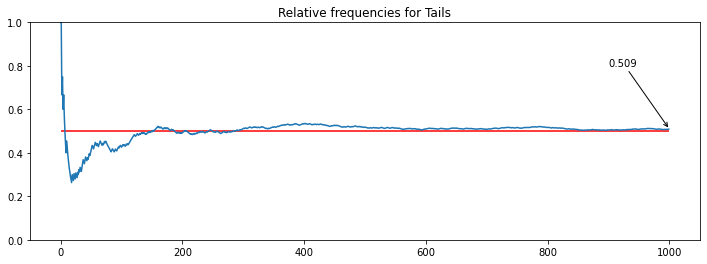

In [2]:
# We will randomly generate 0 for heads, and 1 for tails

n = 1000 # number of tosses

toss = np.zeros(n) # here we will keep the outcomes
freq = np.zeros(n) # here we will keep the frequences

for i in range(n):
    k = random.randint(0, 1) # random integer in [0, 1]
    toss[i] = k
    freq[i] = np.sum(toss)/(i + 1)


# Visualize the relative frequencies
plt.figure(figsize=(12, 4))
plt.hlines(0.5, 0, n, colors='r')
plt.plot(freq)
plt.ylim(0, 1)
plt.title('Relative frequencies for Tails')
plt.annotate(freq[-1], xy=(n, freq[-1]), xytext=(0.9*n, 0.8), arrowprops=dict(arrowstyle='->') )
plt.show()


### Example 2
* Two fair six-sided dice are tossed. Using relative frequencies, estimate the probability $P(B)$ where $B$ is the event:
    * $B$: the sum of two outcomes is 5

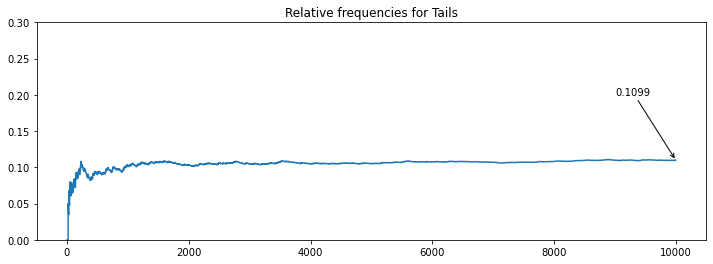

In [3]:
n = 10000 # tosses

sums = np.zeros(n) #here we store the sums
freq = np.zeros(n) #here we store the frequencies

for i in range(n):
    first = random.randint(1, 6) #first die
    second = random.randint(1, 6) #second die
    
    if first + second == 5:
        sums[i] = 1
    
    freq[i] = np.sum(sums)/(i + 1)
    
# Visualize the relative frequencies
plt.figure(figsize=(12, 4))
#plt.hlines(???, 0, n, colors='r')
plt.plot(freq)
plt.ylim(0, 0.3)
plt.title('Relative frequencies for Tails')
plt.annotate(freq[-1], xy=(n, freq[-1]), xytext=(0.9*n, 0.2), arrowprops=dict(arrowstyle='->') )
plt.show()

### Basic probability rules
Note: The logical **or** corresponds to union operation for sets:
\begin{equation} A \cup B \quad\Leftrightarrow \quad A \text{ or } B \end{equation}

The logical **and** corresponds to intersection operation for sets:
\begin{equation} A \cap B \quad\Leftrightarrow \quad A \text{ and } B \end{equation}

We can think of events as subsets of the sample space, so we can visualize them by using Venn diagrams.

Let $A$ and $B$ be some events that can occur in some experiment, and let $S$ be the set of all possible outcomes ($S$ is called **sample space**). Here are the basic rules of probability:
* $0 \leqslant P(A) \leqslant 1$ for any event $A$
* $P(S) = 1$
* If two events $A$ and $B$ cannot happen in the same time, i.e. they are **disjoint** or **mutually exclusive**, then $P(A \cap B) = 0$ and
\begin{equation} P(A \cup B) = P(A) + P(B) \end{equation}
This is the *addition rule for disjoint events*
* In general, when the events $A$ and $B$ are not disjoint (are not mutually exclusive), then $P(A \cap B) \neq 0$ and:
\begin{equation} P(A \cup B) = P(A) + P(B) - P(A \cap B) \end{equation}
This is the *general addition rule*
* For any event $A$, the **complementary event** $A$ does not happen” is labeled by $A'$ and:
\begin{equation} P(A') = 1 - P(A) \end{equation}


### Example 3
Load the *student-mat.csv* data for this example. Details: [https://www.kaggle.com/uciml/student-alcohol-consumption#]

We randomly choose a student from the data set. Consider the following events:
* $A$: the student is female (look at feature *sex*)
* $B$: the student lives in an urban area (look at feature *address*)

Calculate the following probabilities: 
* $P(A)$ and $P(B)$
* $P(A \cap B)$ and $P(A \cup B)$

In [4]:
# Loading the data set
df = pd.read_csv('student-mat.csv')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# Get some data
# rows (the total)
total = df.shape[0]

# females
f = 0
for i in range(total):
    if df['sex'][i] == 'F':
        f = f + 1
PA = f/total

# urbam dwellers
u = 0
for i in range(total):
    if df['address'][i] == 'U':
        u = u + 1
PB = u/total

# female and urban
f_and_u = 0
for i in range(total):
    if df['sex'][i] == 'F' and df['address'][i] == 'U':
        f_and_u = f_and_u + 1
PAaB = f_and_u/total

# female or urban
f_or_u = 0
for i in range(total):
    if df['sex'][i] == 'F' or df['address'][i] == 'U':
        f_or_u = f_or_u + 1
PAoB = f_or_u/total

print('P(A) = ', PA)
print('P(B) = ', PB)
print('P(A and B) = ', PAaB)
print('P(A or B) = ', PAoB)

print(f'Is P(A or B) = P(A) + P(B) - P(A and B)? Answer: {np.allclose(PAoB, PA + PB - PAaB)}')

P(A) =  0.5265822784810127
P(B) =  0.7772151898734178
P(A and B) =  0.4151898734177215
P(A or B) =  0.8886075949367088
Is P(A or B) = P(A) + P(B) - P(A and B)? Answer: True


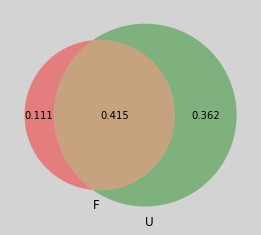

In [6]:
# Visualization time!
plt.figure(facecolor='lightgray')
venn2(subsets = np.round((PA - PAaB, PB - PAaB, PAaB), 3),
      set_labels=['F', 'U'])
plt.show()

### Example 4
Consider the features *mjob* and *fjob* (mother and father job, respectively). Calculate the probability that for a randomly selected student:
* one parent is a teacher
* both parents are teachers
* neither parent is a teacher

In [7]:
# Note that the total is still the same!
# One parent is a teacher
one = 0
for i in range(total):
    if df['Mjob'][i] == 'teacher' or df['Fjob'][i] == 'teacher':
        one = one + 1
Pone = one/total

# Both parents are teachers
two = 0
for i in range(total):
    if df['Mjob'][i] == 'teacher' and df['Fjob'][i] == 'teacher':
        two = two + 1
Ptwo = two/total

# Neither parent is a teacher
neither = 0
for i in range(total):
    if df['Mjob'][i] != 'teacher' and df['Fjob'][i] != 'teacher':
        neither = neither + 1
Pneither = neither/total

print('P(one parent is a teacher) = ', Pone)
print('P(both perents are teachers) = ', Ptwo)
print('P(neither parent is a teacher) = ', Pneither)

P(one parent is a teacher) =  0.189873417721519
P(both perents are teachers) =  0.030379746835443037
P(neither parent is a teacher) =  0.810126582278481


### Conditional Probability & Independent Events
If the occurrence of $A$ and $B$ are dependent on each other, then we can talk about the probability that **$A$ occurs given that $B$ has occurred**. This is the conditional probability of $A$ given $B$, labeled as $P(A \mid B)$. We calculate the conditional probability of $A$ given $B$ as:
\begin{equation} P(A \mid B) = \frac{P(A \cap B)}{P(B)} \end{equation}

Generally, $P(A) \neq P(A \mid B)$. In a case when $P(A) = P(A \mid B)$, then the occurence of $B$ does not influence the occurence of $A$, so we say that $A$ and $B$ are **independent events**. For independent events, it can also be shown that
\begin{equation} P(A \cap B) = P(A) \cdot P(B) \end{equation}

### Example 5
Let $C$ be the event "the student is engaged in romantic relationship", and let $D$ be the event "the student's study time is three or more hours weekly". Calculate the conditional probabilities:
* $P(C \mid D)$ and
* $P(D \mid C)$

In [8]:
# P(C | D)
# Note: total is still the same!
# Using the formula: P(C | D) = P(C and D)/P(D)
CaD = 0
for i in range(total):
    if df['romantic'][i] == 'yes' and df['studytime'][i] >= 3:
        CaD = CaD + 1

D = 0        
for i in range(total):
    if df['studytime'][i] >= 3:
        D = D + 1
            
PCaD = CaD/total
PD = D/total
PCgD = PCaD/PD
print('P(C | D) = ', PCgD)




# Direct calculation: P(D | C)
# If C is satisfied, check if D is also satisfied
C = 0
DgC = 0
for i in range(total):
    if df['romantic'][i] == 'yes':
        C = C + 1
        if df['studytime'][i] >= 3:
            DgC = DgC + 1

PDgC = DgC/C
print('P(D | C) = ', PDgC)

P(C | D) =  0.3695652173913044
P(D | C) =  0.25757575757575757


### Practice example
Let $M_h$ and $F_h$ be the events "the student's mother works in healthcare" and "student's father works in healthcare", respectively. Find the conditional probabilities:
* $P(M_h \mid F_h)$
* $P(F_h \mid M_h)$

### The Monty Hall Problem
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a **car**; behind the others, **goats**. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" [See Wikipedia for details](https://en.wikipedia.org/wiki/Monty_Hall_problem)

![Monty_Hall_problem](monty_hall.png)

*Is it to your advantage to switch your choice?*

Let us run a simulation to answer the question!

P(win by keeping) =  0.36
P(win by switcing) =  0.639


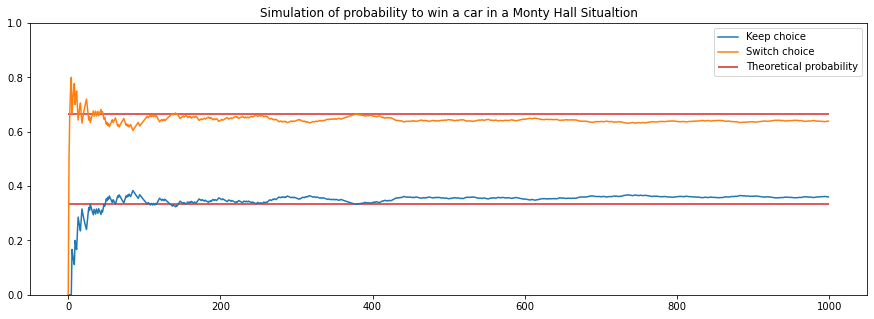

In [9]:
# Number of simulations
n = 1000

# Number of wins
wins_when_keep = np.zeros(n)
wins_when_switch = np.zeros(n)

# Frequencies
freq_keep = np.zeros(n)
freq_switch = np.zeros(n)

# We start simulating
for i in range(n):
    car_is_behind = np.random.choice([1, 2, 3])
    guest_chooses = np.random.choice([1, 2, 3])
    
    if guest_chooses == car_is_behind: # in this case we win if we KEEP the original choice
        wins_when_keep[i] = 1
    else: # in this case we win if we SWITCH the original choice
        wins_when_switch[i] = 1
    freq_keep[i] = np.sum(wins_when_keep[:i])/(i+1)
    freq_switch[i] = np.sum(wins_when_switch[:i])/(i+1)

prob_keep = freq_keep[-1]
prob_switch = freq_switch[-1]

print('P(win by keeping) = ', prob_keep)
print('P(win by switcing) = ', prob_switch)

plt.figure(figsize=(15, 5))
plt.hlines([1/3, 2/3], xmin=0, xmax=n, colors = 'tab:red', label='Theoretical probability')
plt.plot(freq_keep, label='Keep choice')
plt.plot(freq_switch, label = 'Switch choice')
plt.ylim(0, 1)
plt.legend()
plt.title('Simulation of probability to win a car in a Monty Hall Situaltion')
plt.show()